In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Новий розділ

In [3]:
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_data = test_data.drop(['Name','Ticket','Cabin'],axis=1)

In [8]:
test_passenger_ids = test_data['PassengerId']
test_data = test_data.drop(['PassengerId'],axis=1)

In [9]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
train_data['Embarked'] = train_data['Embarked'].fillna('Unknown')
test_data['Embarked'] = test_data['Embarked'].fillna('Unknown') 
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

In [10]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())

In [11]:
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

In [12]:
# Split the training data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [52]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(7,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with learning rate scheduling
history = model.fit(train_data.iloc[:, 1:], train_data.iloc[:, 0], validation_data=(val_data.iloc[:, 1:], val_data.iloc[:, 0]),
                    epochs=100, batch_size=64, callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 0.6197 - accuracy: 0.6826 - val_loss: 0.6061 - val_accuracy: 0.6592 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5912 - accuracy: 0.6938 - val_loss: 0.5823 - val_accuracy: 0.7039 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5725 - accuracy: 0.7065 - val_loss: 0.5648 - val_accuracy: 0.7151 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5577 - accuracy: 0.7289 - val_loss: 0.5502 - val_accuracy: 0.7151 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5443 - accuracy: 0.7247 - val_loss: 0.5387 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5331 - accuracy: 0.7331 - val_loss: 0.5221 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.

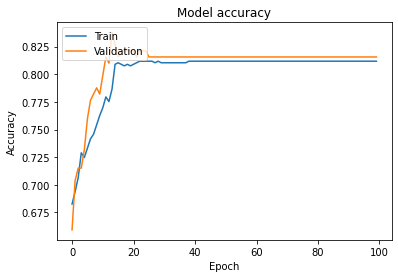

In [53]:
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


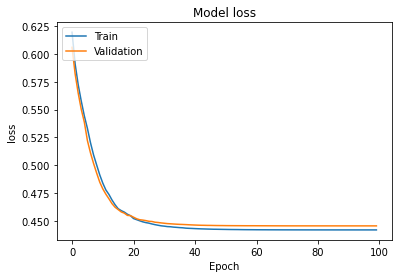

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()